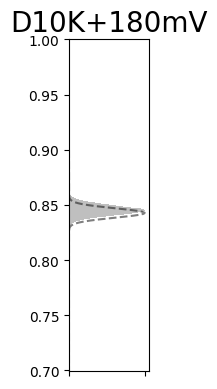

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 只选择D10文件
filename = 'D10K+180mV'
data = np.load(f"{filename}.npz")
counts = data["counts"]
bins = data["bins"]

# 创建图形
fig, ax = plt.subplots(figsize=(1.5, 4))

# 绘制旋转后的直方图
ax.barh(
    1-bins[:-1],  # 左边界
    counts/np.max(counts),     # 高度
    height=np.diff(bins),  # 柱宽
    align="edge",
    color='black',
    alpha=0.25, edgecolor=[], linewidth=0.5
)

bin_centers = (bins[:-1] + bins[1:]) / 2

# 添加参考线
ax.plot(np.exp(-(bin_centers - 0.1573)**2 / (2 * 0.0043**2)), 1 - bin_centers, 'k--', alpha=0.5)
# 如果需要添加更多的参考线，请取消下面行的注释
# ax.plot(np.exp(-(bin_centers - 0.2783)**2 / (2 * 0.0043**2)), 1 - bin_centers, 'r--', alpha=0.5)
# ax.plot(np.exp(-(bin_centers - 0.2914)**2 / (2 * 0.0032**2)), 1 - bin_centers, 'r--', alpha=0.5)

# 设置坐标轴和标题
ax.grid(False)
ax.set_xticklabels([])
ax.set_xlim(0, 1.05)
ax.set_ylim(0.70, 1)
ax.set_title(f"{filename}", fontsize=20)

# 调整布局并保存图像
plt.tight_layout()
plt.savefig('D10_norm_hist.svg', format='svg', dpi=300)

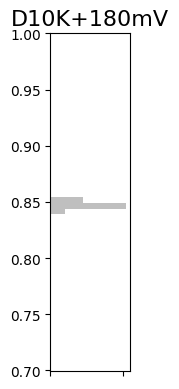

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 只选择D10文件
filename = 'D10K+180mV'
data = np.load(f"{filename}.npz")
segment_median = data["segment_median"]

# 创建图形
fig, ax = plt.subplots(figsize=(1.5, 4))

# 计算直方图
counts, bins = np.histogram(segment_median, bins=101, density=False, range=(0, 0.5))
bin_centers = (bins[:-1] + bins[1:]) / 2  # 计算每个 bin 的中心位置

# 绘制旋转后的直方图
ax.barh(
    1-bin_centers,  # 左边界
    counts,     # 高度
    height=np.diff(bins),  # 柱宽
    align="edge",
    color='black',
    alpha=0.25, edgecolor=[], linewidth=0.5
)

# 设置坐标轴和标题
ax.grid(False)
ax.set_xticklabels([])
# ax.set_xlim(0,1.05)  # 这行被注释掉了，因为可能不需要在x轴上设置极限，或者根据需要调整
ax.set_ylim(0.7, 1)
ax.set_title(f"{filename}", fontsize=16)

# 调整布局并保存图像
plt.tight_layout()
plt.savefig('D10_event_norm_hist.svg', format='svg', dpi=300)

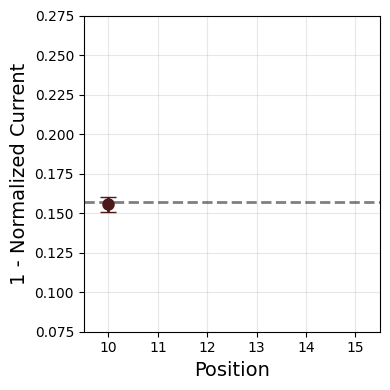

In [4]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['#4d1919']
nt_position = [10]
data = np.array([0.1557])
data_rms = np.array([0.0048])
    
fig, ax = plt.subplots(figsize=(4, 4))

# 绘制误差线
for col in range(data.shape[0]):
    ax.errorbar(nt_position[col], data[col], data_rms[col], fmt='o', 
                linewidth=2, capsize=6, color=colors[col], markersize=8)

# 添加参考线
plt.axhline(y=0.1573, color='k', linestyle='--', linewidth=2, alpha=0.5)

# 计算平均值
unique_positions = sorted(list(set(nt_position)))
avg_values = []

# 按位置分组计算平均值
for pos in unique_positions:
    indices = [i for i, x in enumerate(nt_position) if x == pos]
    values = [data[i] for i in indices]
    avg_values.append(np.mean(values))

# 扩展数据：在两边各延伸一步
if len(unique_positions) > 1:
    step_size = 0.5  # 固定步长
    
    # 创建扩展的位置和值
    extended_positions = [unique_positions[0] - step_size] + unique_positions + [unique_positions[-1] + step_size]
    extended_values = [avg_values[0]] + avg_values + [avg_values[-1]]
    
    # 绘制扩展的阶梯状平均值线
    plt.step(extended_positions, extended_values, 'r--', linewidth=2, alpha=0.5, where='mid')

plt.xlim(9.5, 15.5)
plt.ylim(0.075,0.275)

plt.xlabel('Position', fontsize=14)
plt.ylabel('1 - Normalized Current', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('step_normal.svg',format='svg',dpi=300)

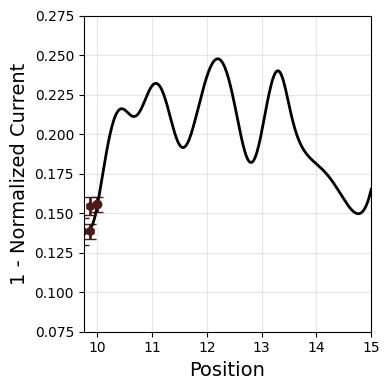

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# 原始完整数据（保留用于拟合）
nt_position = [10, 10, 11, 11, 12, 12, 13, 13, 14, 15]
shifted_factor = [14.2, 14.4, 14.6, 14.8, 15]

data = np.array([
    [0.1819, np.nan, np.nan, 0.2198, 0.1938, np.nan, 0.2450, np.nan, 0.2494, 0.1724],  # 100
    [0.1851, 0.2026, 0.2027, 0.2082, 0.1898, 0.2072, 0.2098, 0.2302, 0.2210, 0.1633],  # 120
    [0.1384, np.nan, 0.2085, 0.2170, 0.2022, np.nan, 0.1872, 0.2090, 0.2008, 0.1508],  # 140
    [0.1384, 0.1545, 0.2093, 0.2296, 0.2158, np.nan, 0.1765, 0.1924, 0.1865, 0.1543],  # 160
    [0.1557, np.nan, 0.2306, 0.2465, 0.2290, 0.2373, 0.1870, 0.1989, 0.1867, 0.1636]   # 180
])
data_rms = np.array([
    [0.0122, np.nan, np.nan, 0.0051, 0.0051, np.nan, 0.0054, np.nan, 0.0060, 0.0050],
    [0.0091, 0.0150, 0.0065, 0.0049, 0.0055, 0.0046, 0.0066, 0.0051, 0.0050, 0.0049],
    [0.0088, np.nan, 0.0074, 0.0047, 0.0052, np.nan, 0.0051, 0.0047, 0.0047, 0.0039],
    [0.0045, 0.0057, 0.0052, 0.0045, 0.0041, np.nan, 0.0042, 0.0048, 0.0040, 0.0037],
    [0.0048, np.nan, 0.0052, 0.0042, 0.0044, 0.0043, 0.0041, 0.0040, 0.0037, 0.0040]
])

fmts = ['^', 's', 'p', 'h', 'o']
colors_D10 = ['#4d1919']  # D10 统一用一种颜色（或保留两色）

fig, ax = plt.subplots(figsize=(4, 4))

# ========================
# 第一步：只绘制 D10 (nt=10) 的数据点
# ========================
for row in range(data.shape[0]):
    for col in range(2):  # nt=10 对应 col=0 和 col=1
        if not np.isnan(data[row, col]) and not np.isnan(data_rms[row, col]):
            x_val = 10 * shifted_factor[row] / 15
            plt.errorbar(
                x_val, data[row, col], data_rms[row, col],
                fmt=fmts[row], linewidth=2, capsize=4,
                color=colors_D10[0], markersize=6
            )

# ========================
# 第二步：用全部数据（D10-D15）拟合样条曲线
# ========================
all_x_full = []
all_y_full = []

for row in range(data.shape[0]):
    for col in range(data.shape[1]):
        if not np.isnan(data[row, col]) and not np.isnan(data_rms[row, col]):
            x_val = nt_position[col] * shifted_factor[row] / 15
            all_x_full.append(x_val)
            all_y_full.append(data[row, col])

# 处理重复 x 值（取 y 平均）
x_arr = np.array(all_x_full)
y_arr = np.array(all_y_full)
unique_x = np.unique(x_arr)
avg_y = [np.mean(y_arr[x_arr == x]) for x in unique_x]

# 样条拟合
if len(unique_x) > 3:
    try:
        spline = UnivariateSpline(unique_x, avg_y, s=0.001, k=min(4, len(unique_x)-1))
        x_smooth = np.linspace(9.85, max(unique_x), 300)
        y_smooth = spline(x_smooth)
        plt.plot(x_smooth, y_smooth, 'k-', linewidth=2)
    except Exception as e:
        print("样条拟合失败:", e)

# ========================
# 设置图形
# ========================
plt.xlim(9.75, 15)
plt.ylim(0.075, 0.275)
plt.xlabel('Position', fontsize=14)
plt.ylabel('1 - Normalized Current', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('spline_normal_D10_points_full_fit.svg', format='svg', dpi=300, bbox_inches='tight')